In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from data_quality import *

In [2]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts2/*.csv')

In [3]:
flights_clean_completeness_ratio_df, flights_dirty_completeness_ratio_df = completeness_dataframes(clean_flights, dirty_flights)

In [4]:
fb_clean_completeness_ratio_df, fb_dirty_completeness_ratio_df = completeness_dataframes(clean_fb, dirty_fb)

In [5]:
flights_clean_distinct_counts_df, flights_dirty_distinct_counts_df = distinct_counts_dataframes(clean_flights, dirty_flights)

In [6]:
fb_clean_distinct_counts_df, fb_dirty_distinct_counts_df = distinct_counts_dataframes(clean_fb, dirty_fb)

### Plots - Metric Analysis

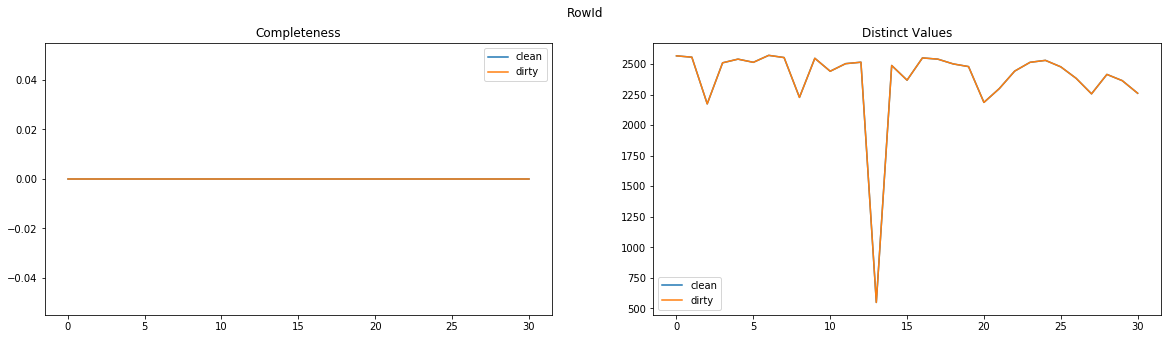

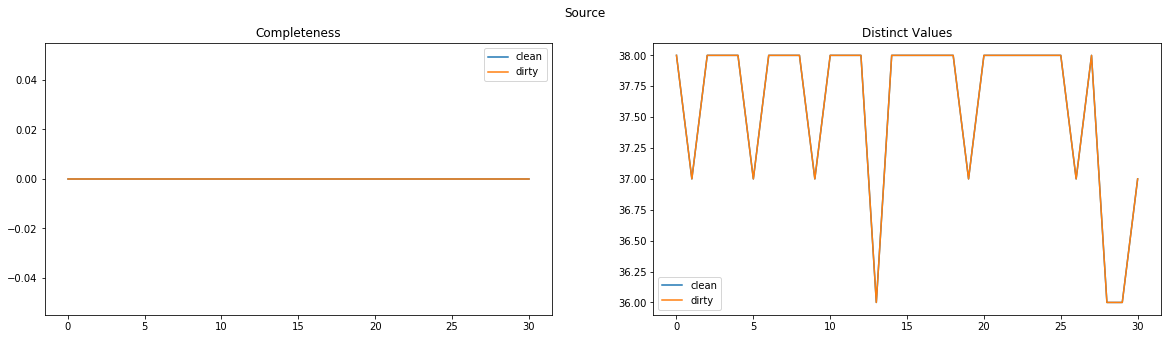

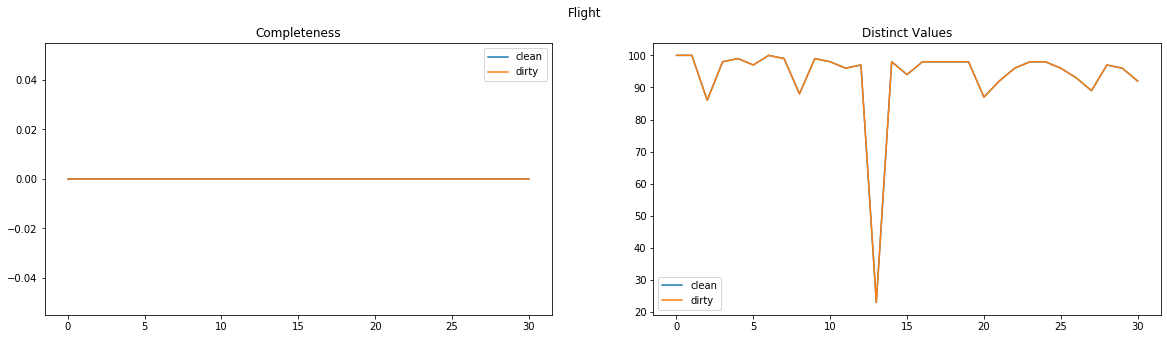

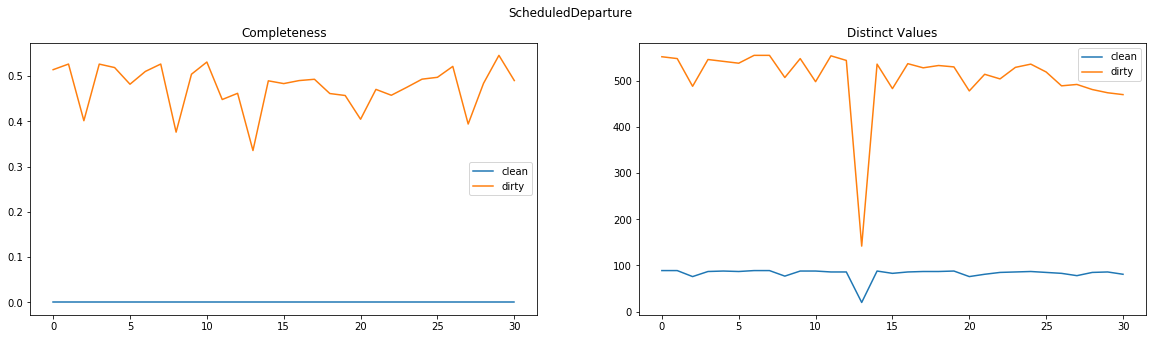

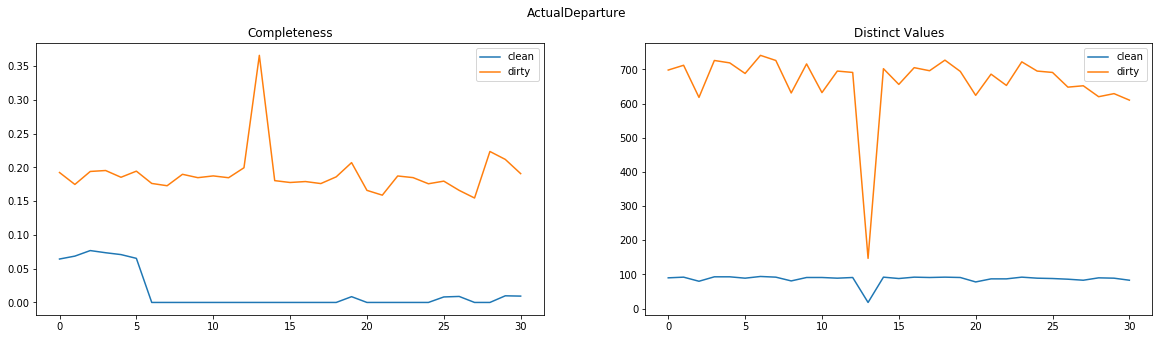

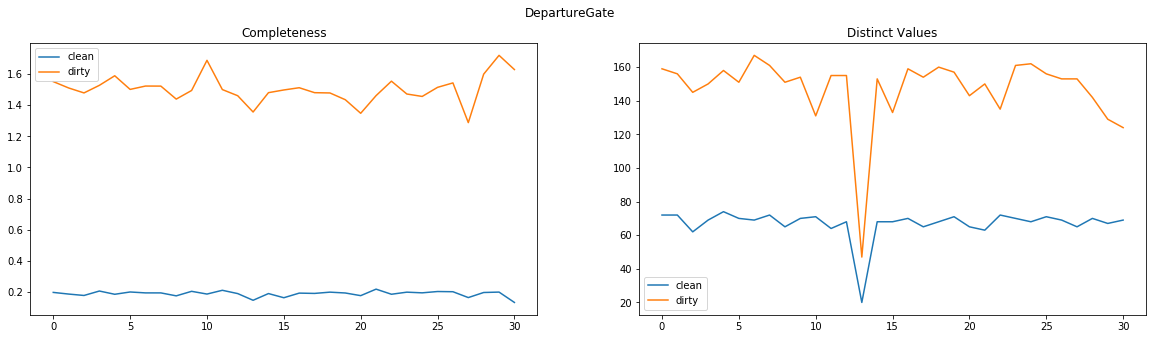

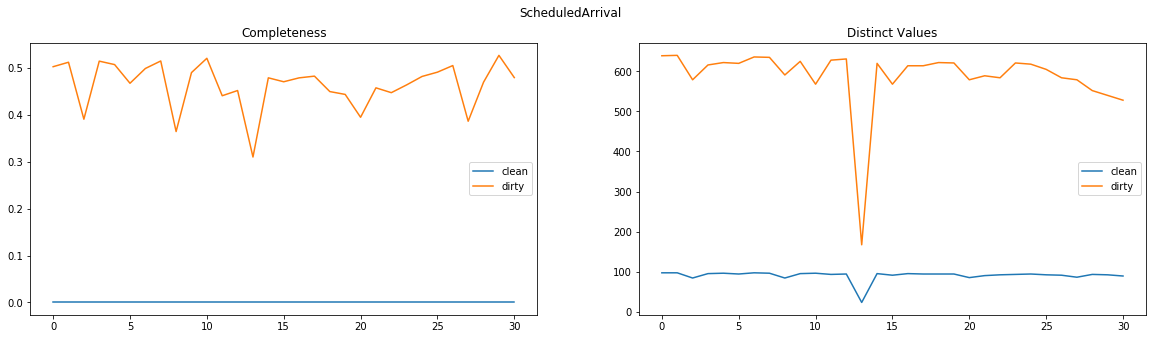

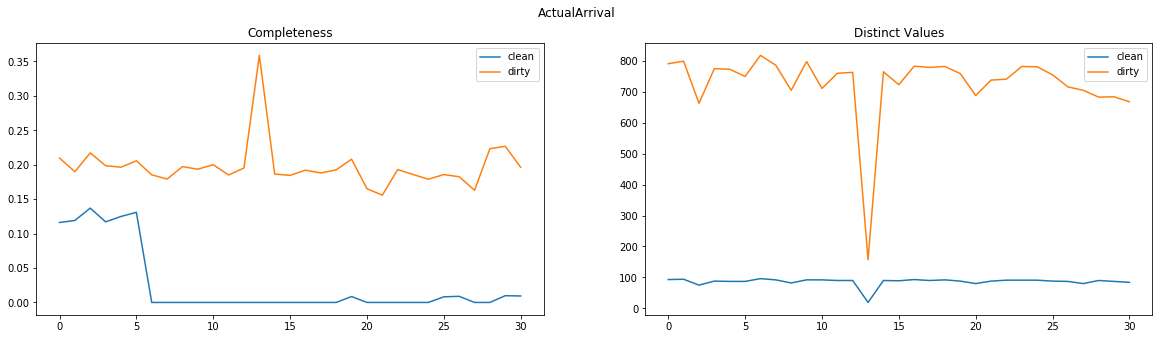

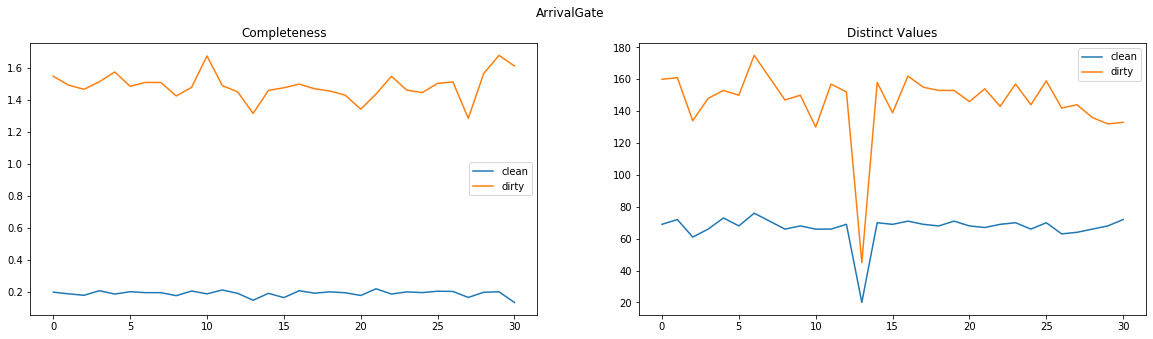

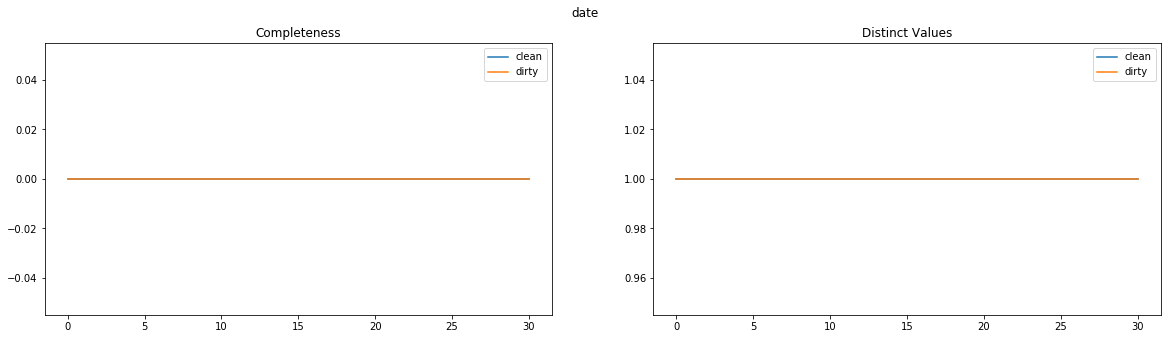

In [7]:
for column in flights_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(flights_clean_completeness_ratio_df.shape[1]), flights_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(flights_dirty_completeness_ratio_df.shape[1]), flights_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(flights_clean_distinct_counts_df.shape[1]), flights_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(flights_dirty_distinct_counts_df.shape[1]), flights_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

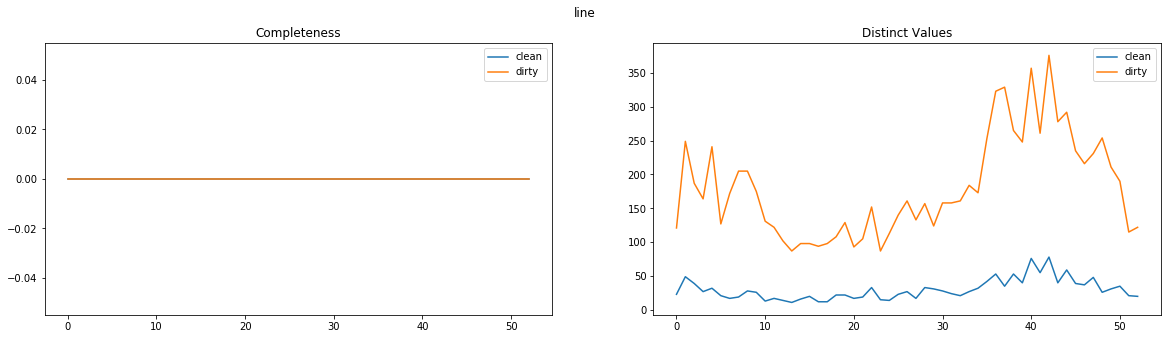

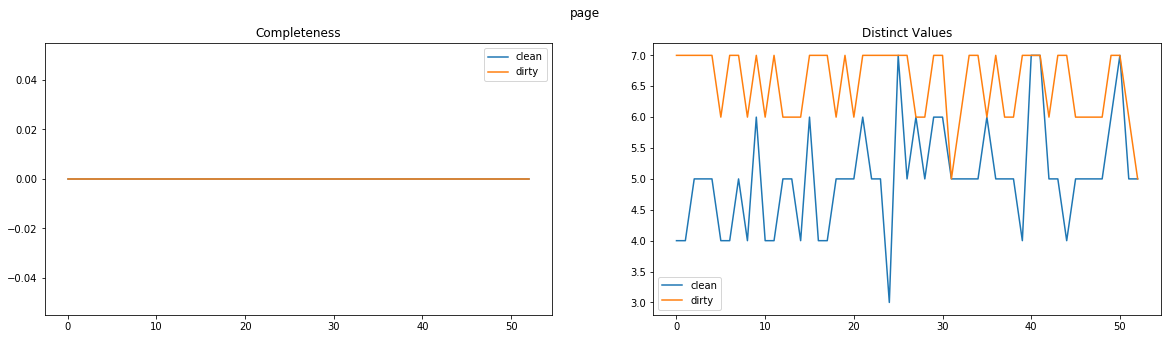

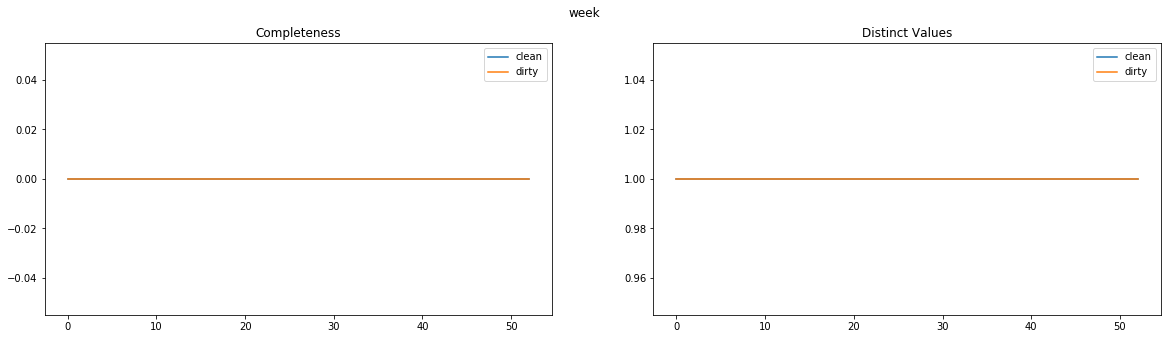

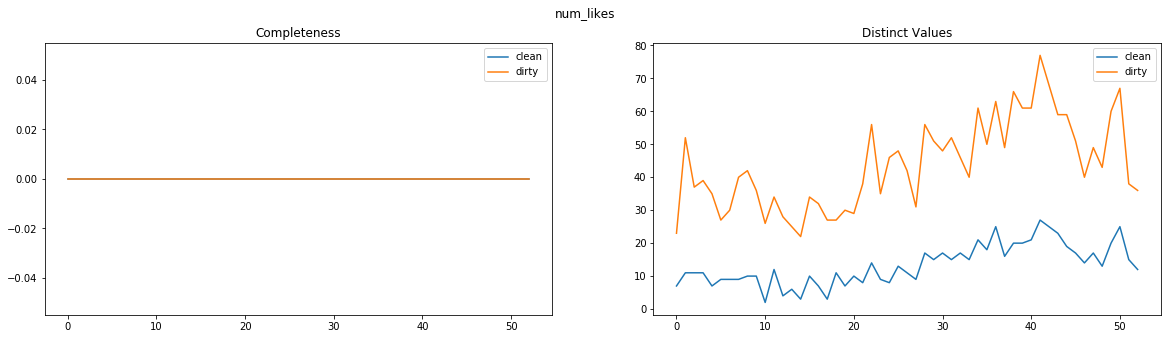

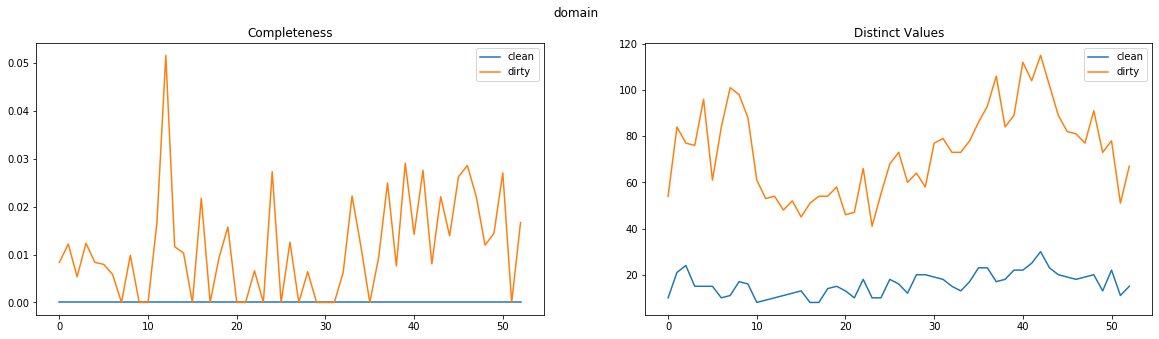

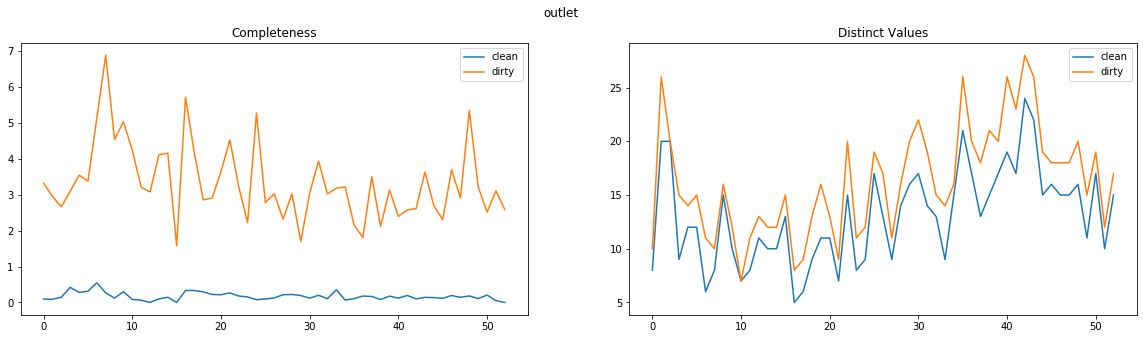

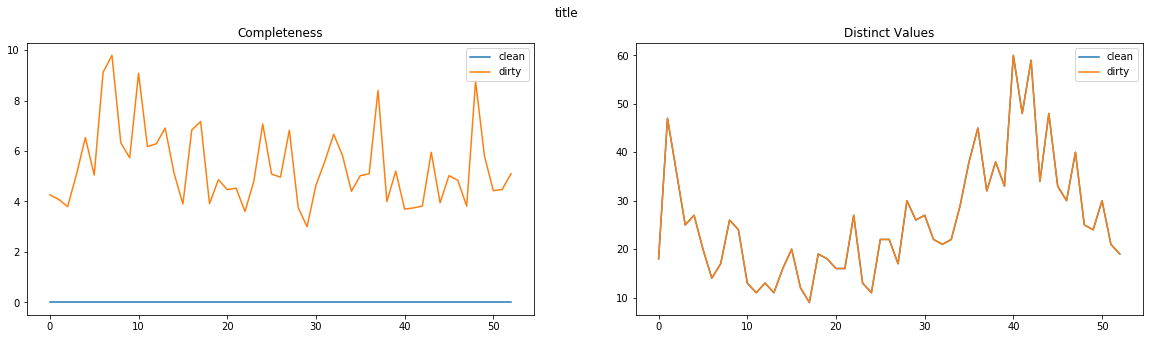

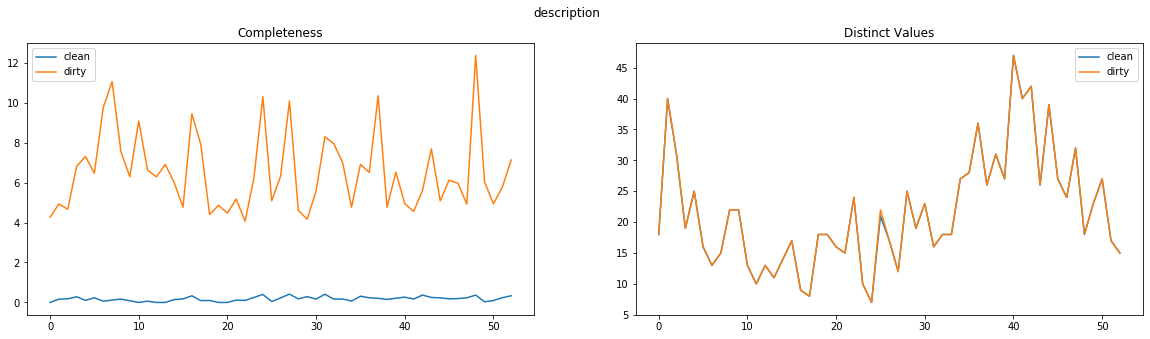

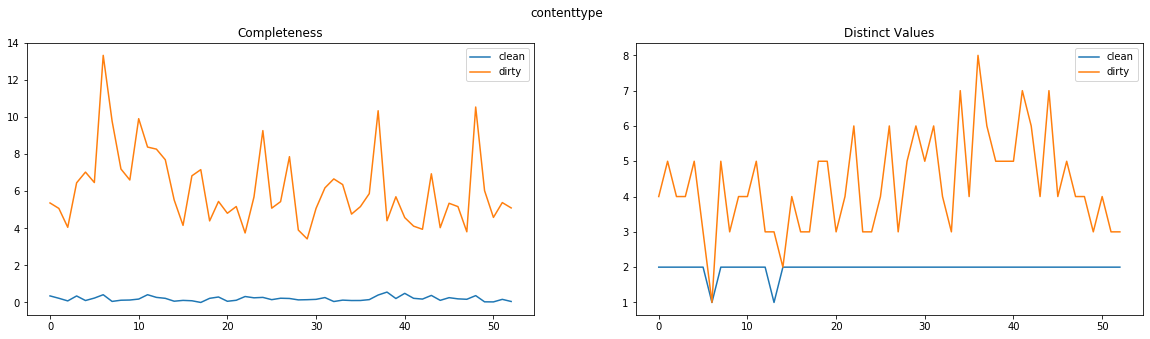

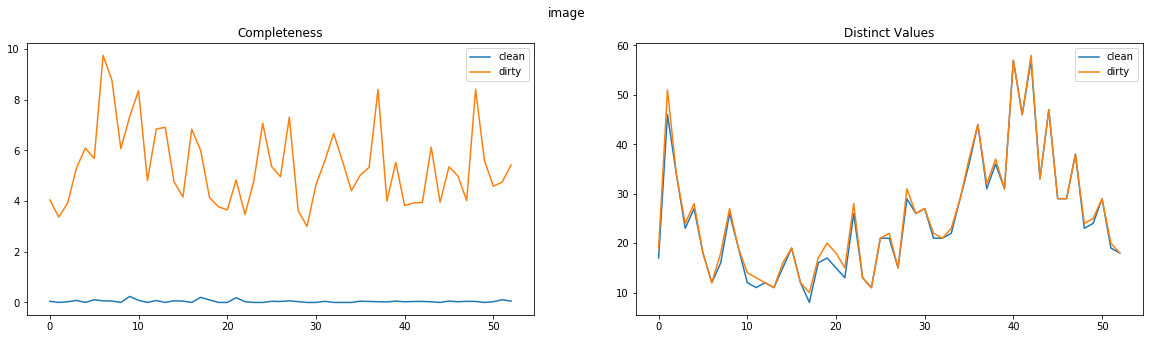

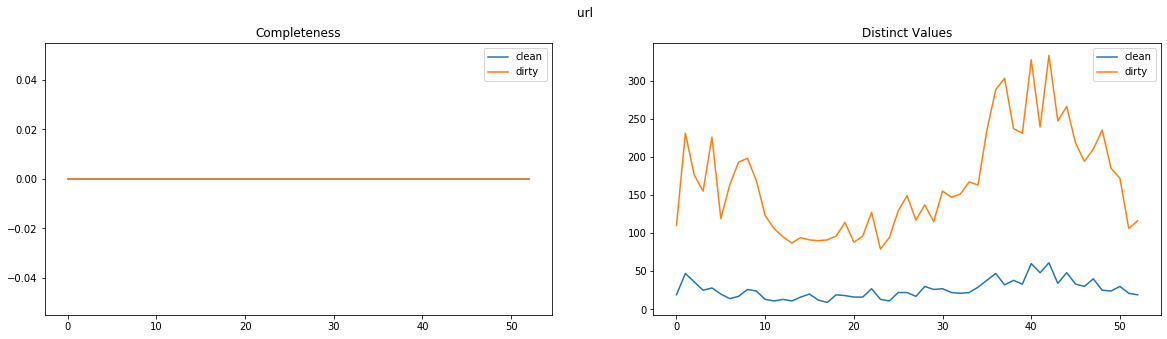

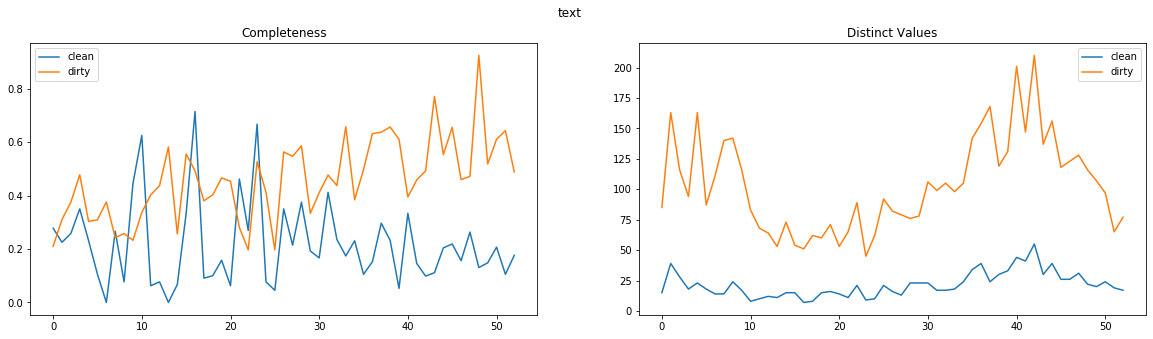

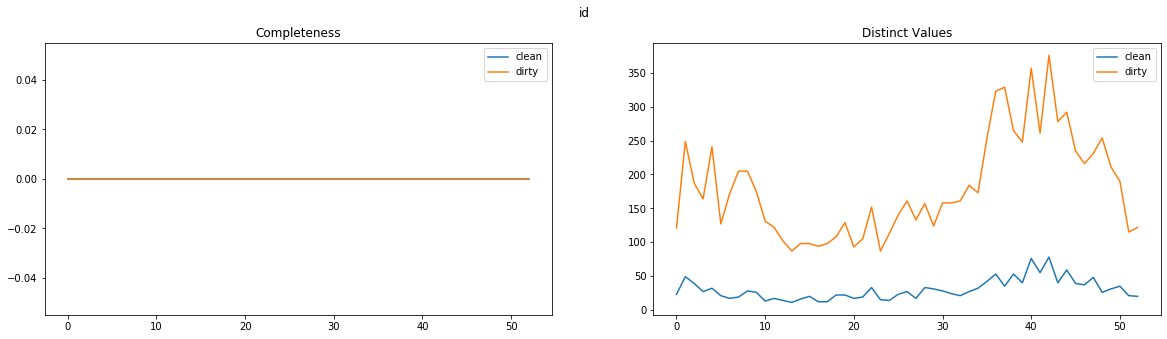

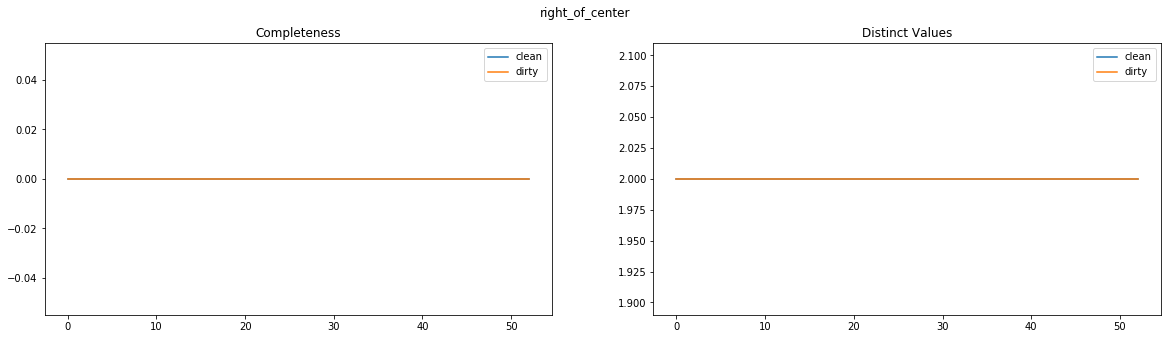

In [8]:
for column in fb_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(fb_clean_completeness_ratio_df.shape[1]), fb_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(fb_dirty_completeness_ratio_df.shape[1]), fb_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(fb_clean_distinct_counts_df.shape[1]), fb_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(fb_dirty_distinct_counts_df.shape[1]), fb_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

### Baseline analysis

In [9]:
print('Clean------------------------------\n',
      flights_clean_completeness_ratio_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      flights_dirty_completeness_ratio_df.mean(axis=1))

Clean------------------------------
 RowId                 0.000000
Source                0.000000
Flight                0.000000
ScheduledDeparture    0.000000
ActualDeparture       0.014968
DepartureGate         0.188292
ScheduledArrival      0.000000
ActualArrival         0.025478
ArrivalGate           0.188728
date                  0.000000
dtype: float64 

Dirty------------------------------
 RowId                 0.000000
Source                0.000000
Flight                0.000000
ScheduledDeparture    0.476794
ActualDeparture       0.190283
DepartureGate         1.503791
ScheduledArrival      0.464570
ActualArrival         0.197457
ArrivalGate           1.488697
date                  0.000000
dtype: float64


For flights: 
- relevant columns: ScheduledDeparture, ActualDeparture, DepartureGate, ScheduledArrival, ActualArrival, ArrivalGate
- if completeness average is larger than 0.2 for those columns than not accepted 

In [10]:
print('Clean------------------------------\n',
      flights_clean_distinct_counts_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      flights_dirty_distinct_counts_df.mean(axis=1))

Clean------------------------------
 RowId                 2381.290323
Source                  37.612903
Flight                  93.483871
ScheduledDeparture      82.935484
ActualDeparture         86.516129
DepartureGate           67.000000
ScheduledArrival        90.354839
ActualArrival           86.322581
ArrivalGate             66.838710
for_key                 82.935484
date                     1.000000
dtype: float64 

Dirty------------------------------
 RowId                 2381.290323
Source                  37.612903
Flight                  93.483871
ScheduledDeparture     508.064516
ActualDeparture        662.903226
DepartureGate          147.225806
ScheduledArrival       588.225806
ActualArrival          728.419355
ArrivalGate            146.225806
date                     1.000000
dtype: float64


For flights: 
- relevant columns: ScheduledDeparture, ActualDeparture, DepartureGate, ScheduledArrival, ActualArrival, ArrivalGate
- if distinct average is larger than 100 for those columns than not accepted 

In [11]:
print('Clean------------------------------\n',
      fb_clean_completeness_ratio_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      fb_dirty_completeness_ratio_df.mean(axis=1))

Clean------------------------------
 line               0.000000
page               0.000000
week               0.000000
num_likes          0.000000
domain             0.000000
outlet             0.172143
title              0.000000
description        0.177228
contenttype        0.200903
image              0.043512
url                0.000000
text               0.217585
id                 0.000000
right_of_center    0.000000
dtype: float64 

Dirty------------------------------
 line               0.000000
page               0.000000
week               0.000000
num_likes          0.000000
domain             0.011395
outlet             3.341735
title              5.402867
description        6.521518
contenttype        6.109355
image              5.378626
url                0.000000
text               0.459134
id                 0.000000
right_of_center    0.000000
dtype: float64


For fb posts: 
- relevant columns: domain, outlet, title, description, contenttype, image, text
- if completeness average is larger than 0.25 for those columns than not accepted 

In [12]:
print('Clean------------------------------\n',
      fb_clean_distinct_counts_df.mean(axis=1), 
      '\n\nDirty------------------------------\n',
      fb_dirty_distinct_counts_df.mean(axis=1))

Clean------------------------------
 line               29.981132
page                5.037736
week                1.000000
num_likes          13.301887
domain             16.056604
outlet             13.056604
title              25.924528
description        21.603774
contenttype         1.962264
image              24.679245
url                26.037736
text               21.528302
id                 29.981132
right_of_center     2.000000
dtype: float64 

Dirty------------------------------
 line               180.528302
page                 6.547170
week                 1.000000
num_likes           43.811321
domain              73.339623
outlet              16.283019
title               25.924528
description         21.622642
contenttype          4.339623
image               25.471698
url                165.716981
text               103.509434
id                 180.528302
right_of_center      2.000000
dtype: float64


For fb posts: 
- relevant columns: line, num_likes, domain, contenttype, url, text, id
- if distinct average is larger than 30 for those columns than not accepted 

In [13]:
def is_acceptable(train_batch, test_batch, method):
    
    if method == 'original':
        completeness_range, distinct_range = determine_acceptable_metric_range(train_batch)
        test_batch_completeness, __ = completeness_dataframes(test_batch, test_batch)
        test_batch_distinct, __ = distinct_counts_dataframes(test_batch, test_batch)
        completeness_within_range = 0
        distinct_within_range = 0
        for i in range(len(test_batch_distinct.values)):
            if test_batch_distinct.values[i][0] >= (distinct_range[i:i+1]['min'][0]) and test_batch_distinct.values[i][0] <= (distinct_range[i:i+1]['max'][0]):
                distinct_within_range = distinct_within_range + 1
            if test_batch_completeness.values[i][0] >= (completeness_range[i:i+1]['min'][0]) and test_batch_completeness.values[i][0] <= (completeness_range[i:i+1]['max'][0]):
                completeness_within_range = completeness_within_range + 1


        if completeness_within_range/test_batch_completeness.shape[0] > .8 and distinct_within_range/test_batch_completeness.shape[0] > .8:
            return True
        else:
            return False
        
    elif method == 'baseline':
        
        #if flights data
        if 'FLIGHTS' in test_batch[0]: 
            data = 'flight'
        #if facebook data    
        if 'FBPosts' in test_batch[0]: 
            data = 'fb'

        if data == 'flight':
            test_batch_completeness, __ = completeness_dataframes(test_batch, test_batch)
            test_batch_distinct, __ = distinct_counts_dataframes(test_batch, test_batch)
            accepted = 0
            not_accepted = 0
            for i in range(len(test_batch_distinct.values)):
                # values based off mean values for flights data of distinct values and completeness
                if test_batch_distinct.values[i][0] > 100 and test_batch_completeness.values[i][0] > 0.2:
                    not_accepted += 1 # if both values true than add to not_accepted
                else:
                    accepted += 1 # if not then accepted

            if not_accepted == 0:
                return True
            else:
                return False
                
        if data == 'fb':
            test_batch_completeness, __ = completeness_dataframes(test_batch, test_batch)
            test_batch_distinct, __ = distinct_counts_dataframes(test_batch, test_batch)
            accepted = 0
            not_accepted = 0
            for i in range(len(test_batch_distinct.values)):
                # values based off mean values for fb data of distinct values and completeness
                if test_batch_distinct.values[i][0] > 30 and test_batch_completeness.values[i][0] > 0.25:
                    not_accepted += 1 # if both values true than add to not_accepted
                else:
                    accepted += 1 # if not then accepted

            if not_accepted == 0:
                return True
            else:
                return False
           

In [14]:
def analysis(i, train_type, clean, dirty, batch_size, method):
    if train_type == 'rolling':
        dirty_val = is_acceptable(clean[i:i+batch_size], dirty[i+batch_size: i+batch_size+1], method)
        clean_val = is_acceptable(clean[i:i+batch_size], clean[i+batch_size: i+batch_size+1], method)
    else:
        dirty_val = is_acceptable(clean[0:i+batch_size], dirty[i+batch_size: i+batch_size+1], method)
        clean_val = is_acceptable(clean[0:i+batch_size], clean[i+batch_size: i+batch_size+1], method)
    if dirty_val == False:
        dirty_correct = True
    else:
        dirty_correct = False
    if clean_val== True:
        clean_correct = True
    else:
        clean_correct = False
    row = [train_type, batch_size, i, clean_correct, dirty_correct]
    return row  

In [15]:
fb_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_fb)-batch_size):
            row = analysis(i, train_type, clean_fb, dirty_fb, batch_size, 'baseline')
            fb_analysis.loc[counter] = row
            counter = counter + 1


In [16]:
fb_analysis

,train_type,batch_size,test_batch,clean_correct,dirty_correct
0,rolling,1,0,True,True
1,rolling,1,1,True,True
2,rolling,1,2,True,True
3,rolling,1,3,True,True
4,rolling,1,4,True,True
...,...,...,...,...,...
859,increasing,9,39,True,True
860,increasing,9,40,True,True
861,increasing,9,41,True,True
862,increasing,9,42,True,True


In [17]:
fb_accuracy = get_accuracy(fb_analysis)

In [18]:
fb_accuracy

,train_type,batch_size,accuracy
0,increasing,1,0.932692
1,increasing,2,0.931373
2,increasing,3,0.930000
3,increasing,4,0.928571
4,increasing,5,0.927083
5,increasing,6,0.925532
6,increasing,7,0.923913
7,increasing,8,0.933333
8,increasing,9,0.931818
9,rolling,1,0.932692


In [19]:
flights_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_flights)-batch_size):
            row = analysis(i, train_type, clean_flights, dirty_flights, batch_size, 'baseline')
            flights_analysis.loc[counter] = row
            counter = counter + 1

In [20]:
flights_accuracy = get_accuracy(flights_analysis)

In [21]:
flights_accuracy

,train_type,batch_size,accuracy
0,increasing,1,1.0
1,increasing,2,1.0
2,increasing,3,1.0
3,increasing,4,1.0
4,increasing,5,1.0
5,increasing,6,1.0
6,increasing,7,1.0
7,increasing,8,1.0
8,increasing,9,1.0
9,rolling,1,1.0


### Batch Accuracy Plots

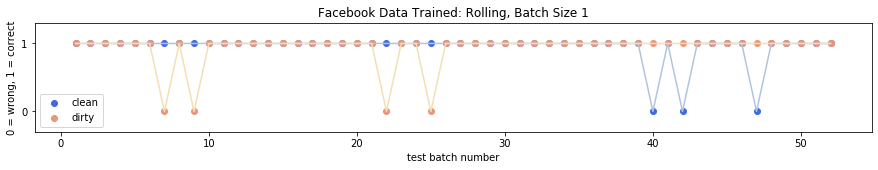

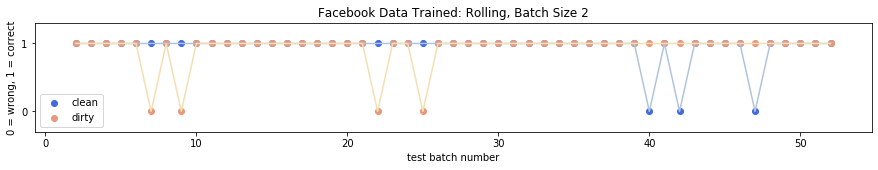

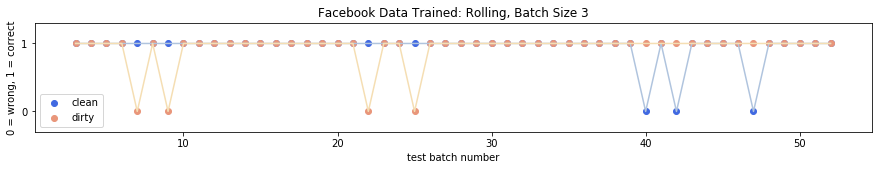

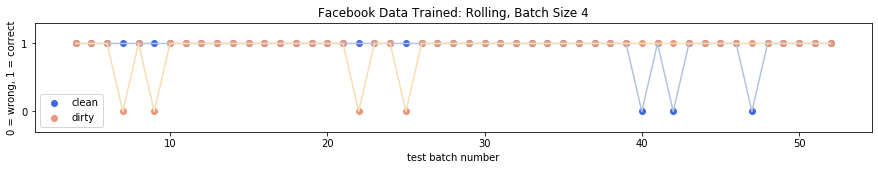

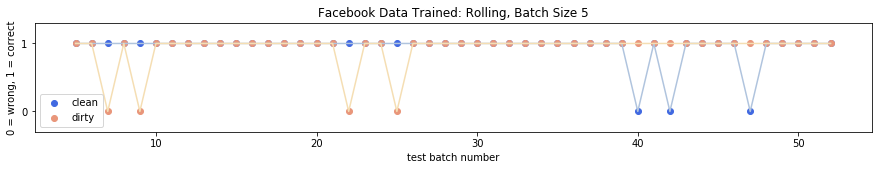

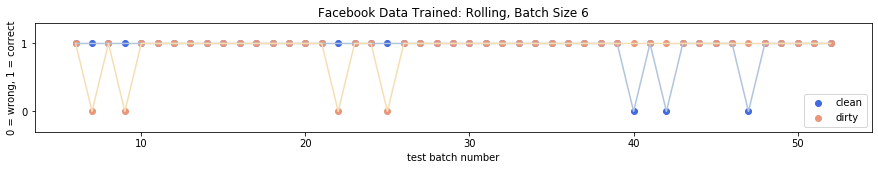

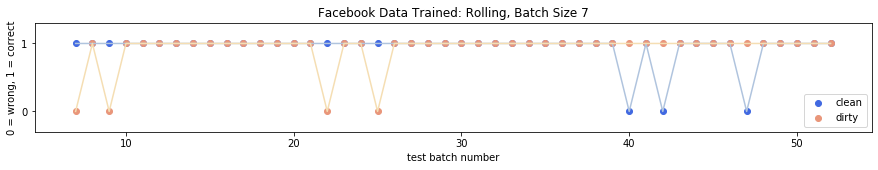

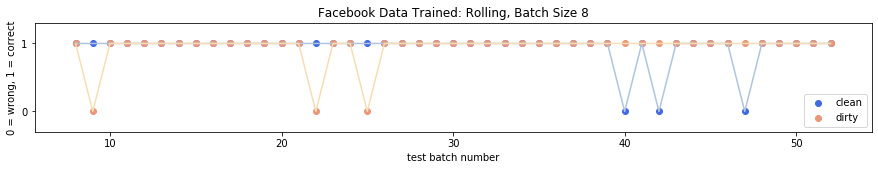

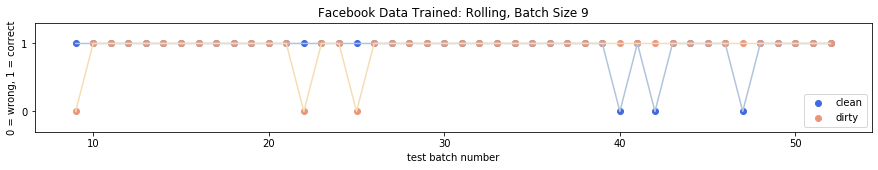

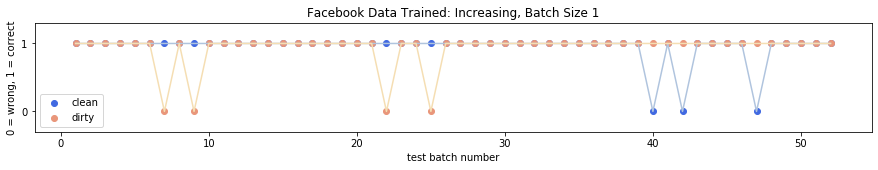

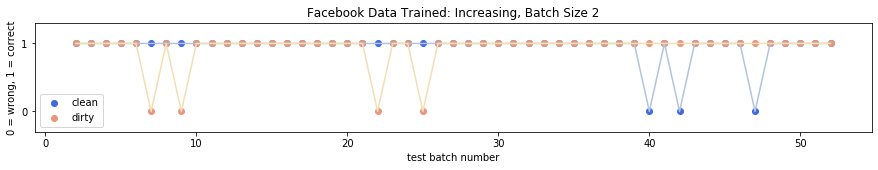

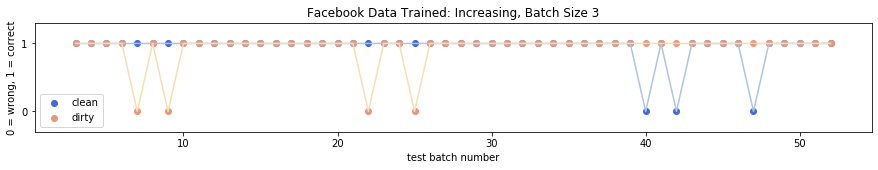

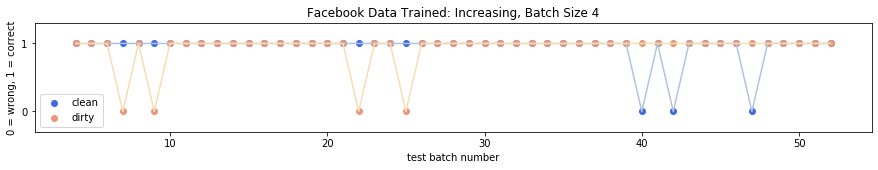

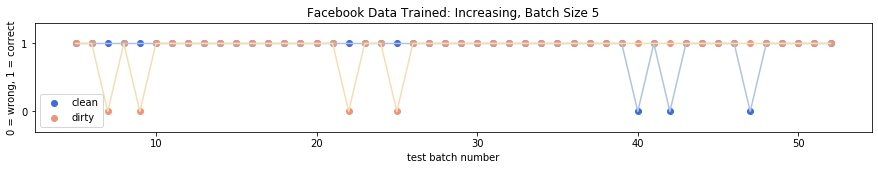

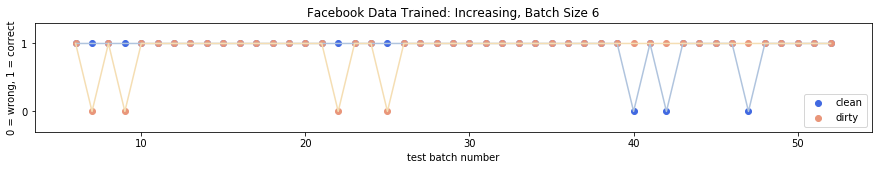

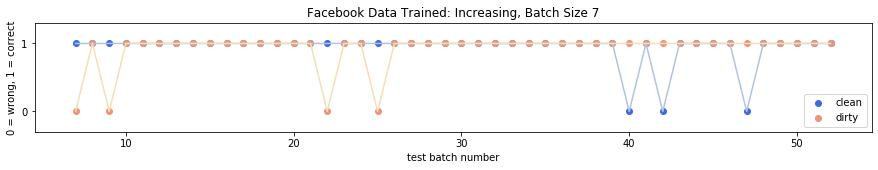

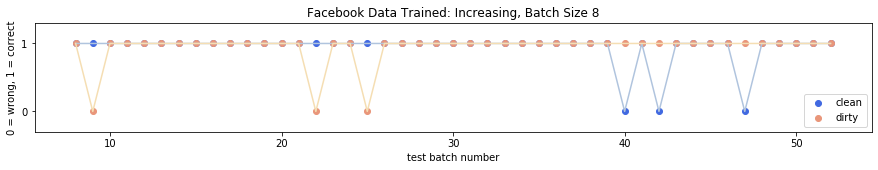

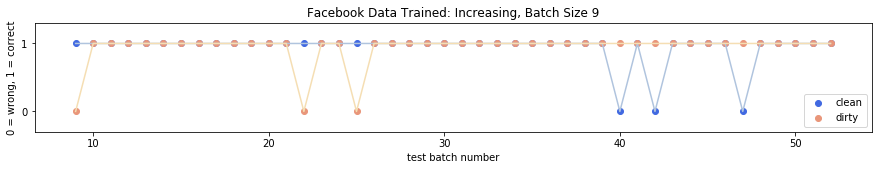

In [22]:
plot_batch('facebook', fb_analysis, range(1, 10))

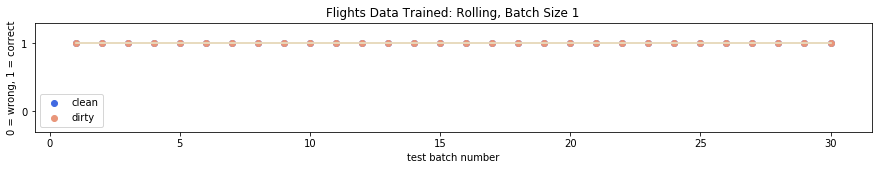

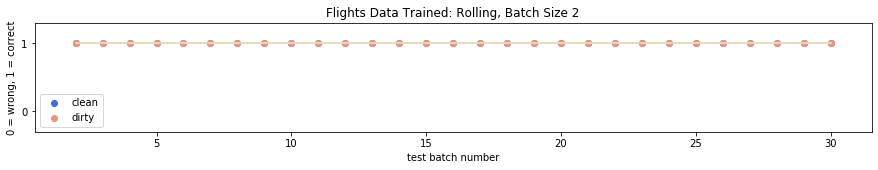

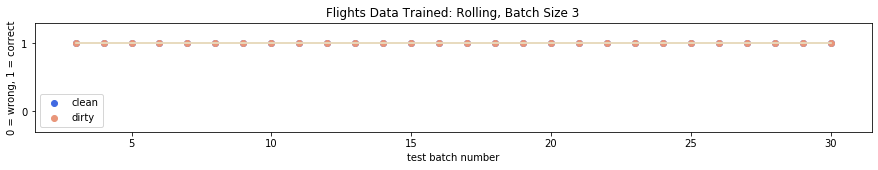

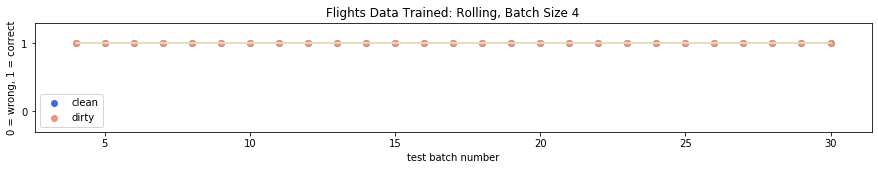

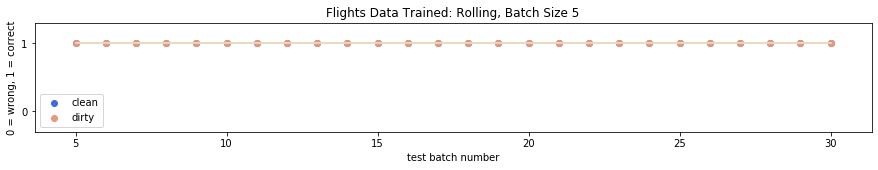

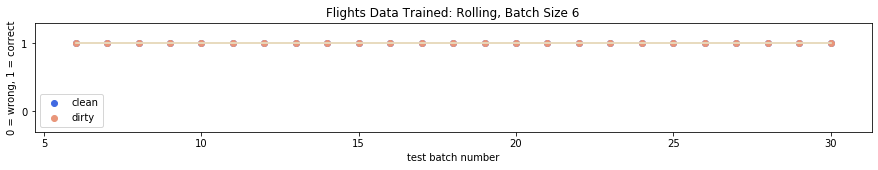

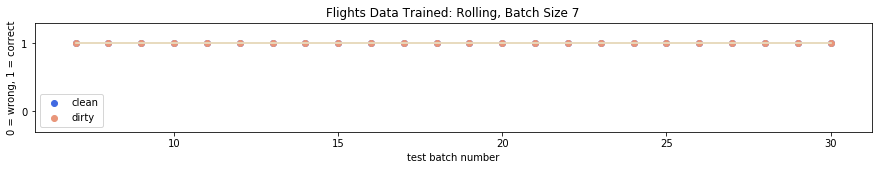

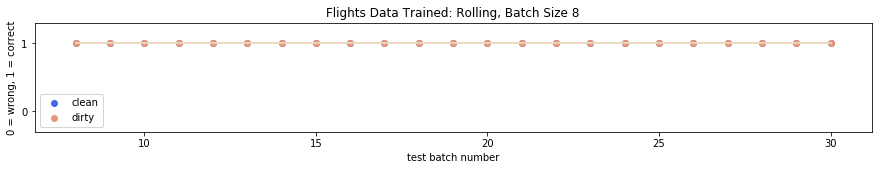

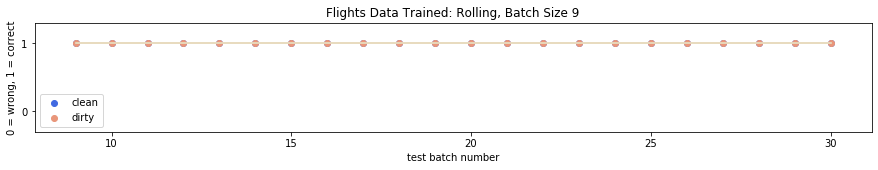

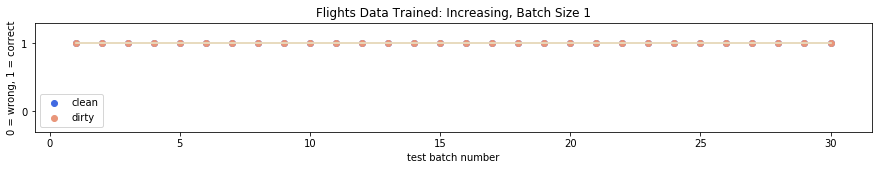

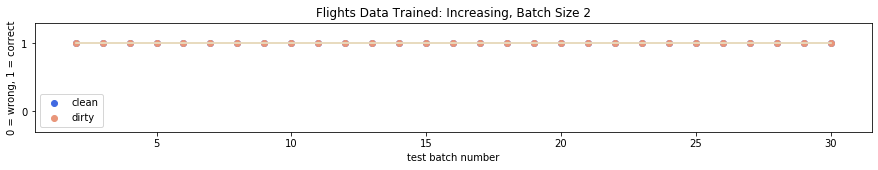

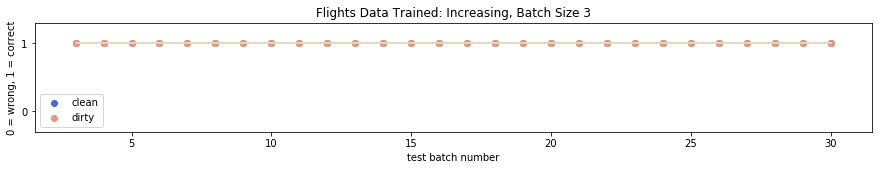

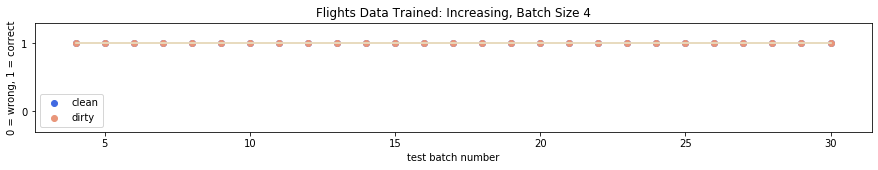

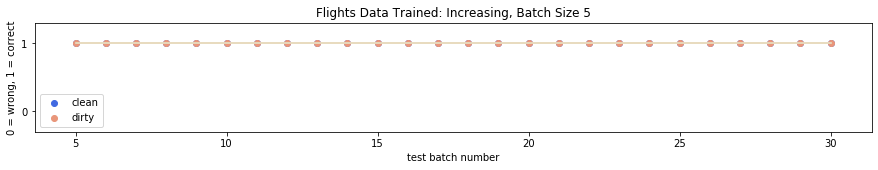

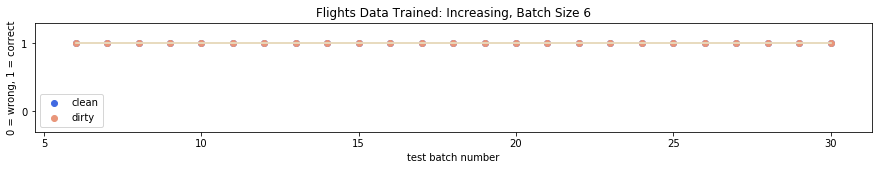

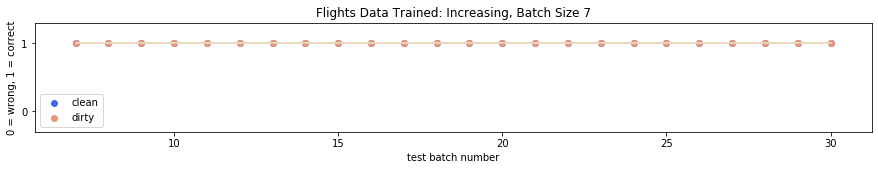

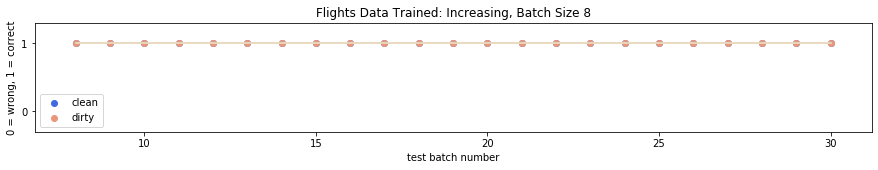

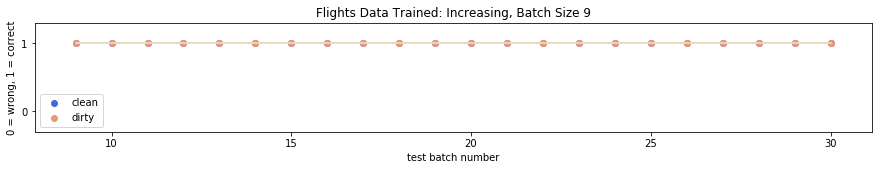

In [23]:
plot_batch('flights', flights_analysis, range(1, 10))